In [3]:
import os
import pandas as pd
os.getcwd()

'g:\\My projects\\SpotifyTrendsAnalyzer\\Notebook'

In [4]:


# Try different encodings
df = pd.read_csv('../Data_set/spotify_songs_cleaned.csv', encoding='ISO-8859-1')



In [5]:
df.head()

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration
0,I TRIED FOR YEARS... NOBODY LISTENED,Iceberg Black,18,WAR,2018.0,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,91.4,40.8,10,-6.71,0,14.10,2.680000,11.6,9.44,140.03,2:30
1,This Is Seagull??.,The Snake Corps,34,Smother Earth,1990.0,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,51.6,58.0,9,-13.29,0,2.95,0.000243,11.0,23.50,135.90,3:58
2,#1 Stunna,Big Tymers,48,I Got That Work,2000.0,Hip-Hop Drive,rap,hip hop,55.2,84.2,8,-4.96,1,28.50,1.760000,25.8,56.10,89.02,4:41
3,#NAKAMA,XLII,26,#NAKAMA,2019.0,Girl On Fire,r&b,hip pop,79.7,97.0,3,-3.20,1,5.45,38.500000,31.8,56.80,108.04,3:12
4,#Natural,Paty Cant?§,50,#Natural,2017.0,latin hip hop,latin,latin hip hop,80.0,83.6,0,-3.54,0,5.68,11.400000,13.4,81.60,97.02,3:47


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26159 entries, 0 to 26158
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         26158 non-null  object 
 1   track_artist       26158 non-null  object 
 2   track_popularity   26159 non-null  int64  
 3   track_album_name   26158 non-null  object 
 4   released_year      26139 non-null  float64
 5   playlist_name      26159 non-null  object 
 6   playlist_genre     26159 non-null  object 
 7   playlist_subgenre  26159 non-null  object 
 8   danceability       26159 non-null  float64
 9   energy             26159 non-null  float64
 10  key                26159 non-null  int64  
 11  loudness           26159 non-null  float64
 12  mode               26159 non-null  int64  
 13  speechiness        26159 non-null  float64
 14  acousticness       26159 non-null  float64
 15  liveness           26159 non-null  float64
 16  valence            261

In [7]:
df.describe(include='all')

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration
count,26158,26158,26159.000000,26158,26139.000000,26159,26159,26159,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159.000000,26159
unique,23383,10690,NaN,18997,NaN,448,6,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472
top,Breathe,Queen,NaN,Greatest Hits,NaN,Indie Poptimism,rap,progressive electro house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3:24
freq,18,111,NaN,102,NaN,278,4983,1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267
mean,NaN,NaN,40.497802,NaN,2006.460041,NaN,NaN,NaN,65.379678,69.624791,5.375779,-6.842483,0.563783,10.877297,18.097262,19.122692,50.620517,121.007711,NaN
std,NaN,NaN,23.209914,NaN,26.540004,NaN,NaN,NaN,14.558088,18.480863,3.614458,3.049061,0.495925,10.335517,22.633492,15.666042,23.469540,26.938576,NaN
min,NaN,NaN,0.000000,NaN,1905.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-46.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,24.000000,NaN,2008.000000,NaN,NaN,NaN,56.200000,57.700000,2.000000,-8.340000,0.000000,4.110000,1.440000,9.290000,32.400000,99.980000,NaN
50%,NaN,NaN,43.000000,NaN,2016.000000,NaN,NaN,NaN,67.000000,72.000000,6.000000,-6.280000,1.000000,6.300000,8.160000,12.700000,50.700000,122.020000,NaN
75%,NaN,NaN,58.000000,NaN,2019.000000,NaN,NaN,NaN,76.000000,84.200000,9.000000,-4.730000,1.000000,13.500000,26.800000,24.800000,69.000000,134.030000,NaN


In [8]:
non_alpha_artists = df[df['track_artist'].str.contains('[^a-zA-Z\s]', na=False)]

# Show the rows where 'track_artist' contains non-alphabetic characters
print(non_alpha_artists)

# Count the number of such rows
count_non_alpha_artists = non_alpha_artists.shape[0]
print(f"Number of rows with non-alphabetic characters in 'track_artist': {count_non_alpha_artists}")

                                     track_name       track_artist  \
4                                      #Natural        Paty Cant?§   
17                      (Don't Fear) The Reaper  Blue ??yster Cult   
18     (Don't Fear) The Reaper - Single Version  Blue ??yster Cult   
44                              *Low End Theory  Saturn, Alexander   
51                                       .suede            junyii.   
...                                         ...                ...   
26104                            Youth Memories            Flj?§ga   
26105                       Youth of the Nation             P.O.D.   
26133                          Zero For Conduct  Block B - BASTARZ   
26146                                    Zirkus        badm??mzjay   
26150                Zombie - Bassjackers Remix              Ran-D   

       track_popularity                           track_album_name  \
4                    50                                   #Natural   
17                 

In [9]:
count_all=df['track_artist'].count()
print(count_all)

26158


In [10]:
percentage_non_alpha=(count_non_alpha_artists/count_all)*100
print(percentage_non_alpha)

13.471977979967885


In [11]:
# Remove rows where 'track_artist' contains non-alphabetic characters and assign to df2
df2 = df[~df['track_artist'].str.contains('[^a-zA-Z\s]', na=False)]

# Verify the cleaned DataFrame
print(df2.head(5))

#


                             track_name     track_artist  track_popularity  \
0  I TRIED FOR YEARS... NOBODY LISTENED    Iceberg Black                18   
1                   This Is Seagull??.  The Snake Corps                34   
2                             #1 Stunna       Big Tymers                48   
3                               #NAKAMA             XLII                26   
5                              #S?­dico         Rawayana                53   

  track_album_name  released_year  \
0              WAR         2018.0   
1    Smother Earth         1990.0   
2  I Got That Work         2000.0   
3          #NAKAMA         2019.0   
5         #S?­dico         2019.0   

                                       playlist_name playlist_genre  \
0                 Rap Party 24/7 Radio / Gangsta Rap            rap   
1  Maxi Pop  GOLD (New Wave, Electropop, Synth Po...            pop   
2                                      Hip-Hop Drive            rap   
3                       

In [12]:
non_alpha_track_names = df2[df2['track_name'].str.contains('[^a-zA-Z\s]', na=False)]
count_non_alpha_tracks = non_alpha_track_names.shape[0]
print(count_non_alpha_tracks)

8525


In [13]:
non_alpha_track_names['track_name']

0        I TRIED FOR YEARS... NOBODY LISTENED
1                         This Is Seagull??.
2                                   #1 Stunna
3                                     #NAKAMA
5                                    #S?­dico
                         ...                 
26141          Ziggy Stardust - 1997 Remaster
26145                        Zipolite - Remix
26147                    ZMSW [QQ Untitled01]
26152               Zoom - Remasterizado 2007
26154           Zu Den Sternen - Original Mix
Name: track_name, Length: 8525, dtype: object

In [14]:
df2 = df2[~df2['track_name'].str.match(r'^\?+$', na=False)]



In [15]:
non_alpha_pattern = r'[^a-zA-Z ]'

# Replace non-alphabetic characters with an empty string, keeping spaces
df2['track_name_cleaned'] = df2['track_name'].str.replace(non_alpha_pattern, '', regex=True)

# Display the original and cleaned DataFrame
print(df2[['track_name', 'track_name_cleaned']])

                                 track_name                 track_name_cleaned
0      I TRIED FOR YEARS... NOBODY LISTENED  I TRIED FOR YEARS NOBODY LISTENED
1                       This Is Seagull??.                    This Is Seagull
2                                 #1 Stunna                             Stunna
3                                   #NAKAMA                             NAKAMA
5                                  #S?­dico                              Sdico
...                                     ...                                ...
26154         Zu Den Sternen - Original Mix       Zu Den Sternen  Original Mix
26155                               Zum Zum                            Zum Zum
26156                                 Zumba                              Zumba
26157                             Zun Da Da                          Zun Da Da
26158              Zweistellige Haftstrafen           Zweistellige Haftstrafen

[22634 rows x 2 columns]


In [16]:
df2[['track_name','track_name_cleaned']].head(30)

,track_name,track_name_cleaned
0,I TRIED FOR YEARS... NOBODY LISTENED,I TRIED FOR YEARS NOBODY LISTENED
1,This Is Seagull??.,This Is Seagull
2,#1 Stunna,Stunna
3,#NAKAMA,NAKAMA
5,#S?­dico,Sdico
6,#Summerlovin,Summerlovin
7,#Twerkit,Twerkit
8,#Vivalawldkdz (Roberto Rosso Remix) [feat. Twe...,Vivalawldkdz Roberto Rosso Remix feat Twelve
9,$$$ - Remix,Remix
10,$. A. N. T. E. R. ?. A.,A N T E R A


In [17]:
zero_popularity_songs = df2[df2['track_popularity'] == 0]

# Count the number of songs with popularity of 0
count_zero_popularity = zero_popularity_songs.shape[0]  # or len(zero_popularity_songs)

# Display the count
print(f'Number of songs with popularity 0: {count_zero_popularity}')

Number of songs with popularity 0: 1917


In [18]:
print(non_alpha_track_names['released_year']==2020)



0        False
1        False
2        False
3        False
5        False
         ...  
26141    False
26145     True
26147    False
26152    False
26154    False
Name: released_year, Length: 8525, dtype: bool


In [19]:
# Group by the released year and count the number of non-alpha track names for each year
non_alpha_count_per_year = non_alpha_track_names.groupby('released_year')['track_name'].count()

# Convert the result to a DataFrame
non_alpha_count_df = non_alpha_count_per_year.reset_index()
non_alpha_count_df.columns = ['Released Year', 'Non-Alphabetic Track Count']

# Sort the DataFrame by 'Non-Alphabetic Track Count' in descending order (optional)
non_alpha_count_df = non_alpha_count_df.sort_values(by='Non-Alphabetic Track Count', ascending=False)

# Display the resulting DataFrame
non_alpha_count_df

,Released Year,Non-Alphabetic Track Count
57,2019.0,2087
56,2018.0,842
55,2017.0,630
54,2016.0,590
53,2015.0,583
52,2014.0,514
0,1905.0,506
51,2013.0,291
50,2012.0,192
58,2020.0,153


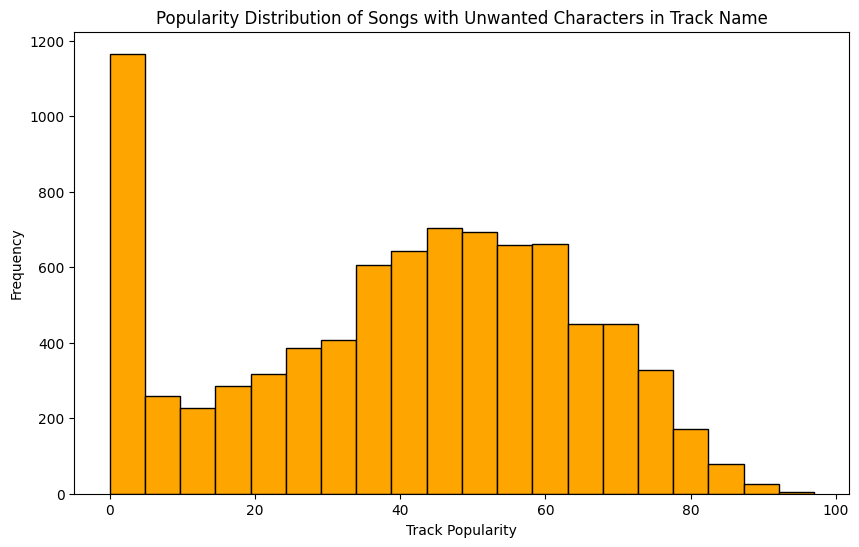

In [20]:
import matplotlib.pyplot as plt

# Plot popularity distribution for the unwanted rows (based on track_name)
plt.figure(figsize=(10, 6))
plt.hist(non_alpha_track_names['track_popularity'], bins=20, color='orange', edgecolor='black')
plt.title('Popularity Distribution of Songs with Unwanted Characters in Track Name')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()


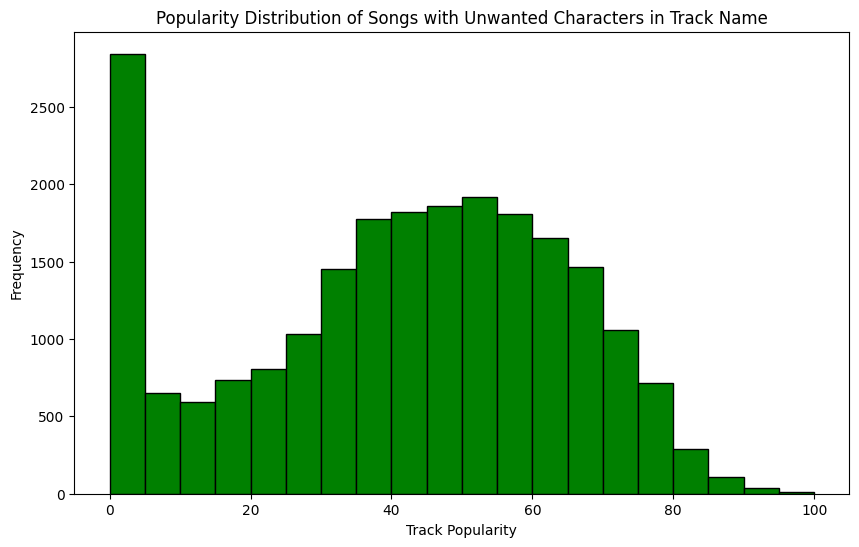

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df2['track_popularity'], bins=20, color='green', edgecolor='black')
plt.title('Popularity Distribution of Songs with Unwanted Characters in Track Name')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

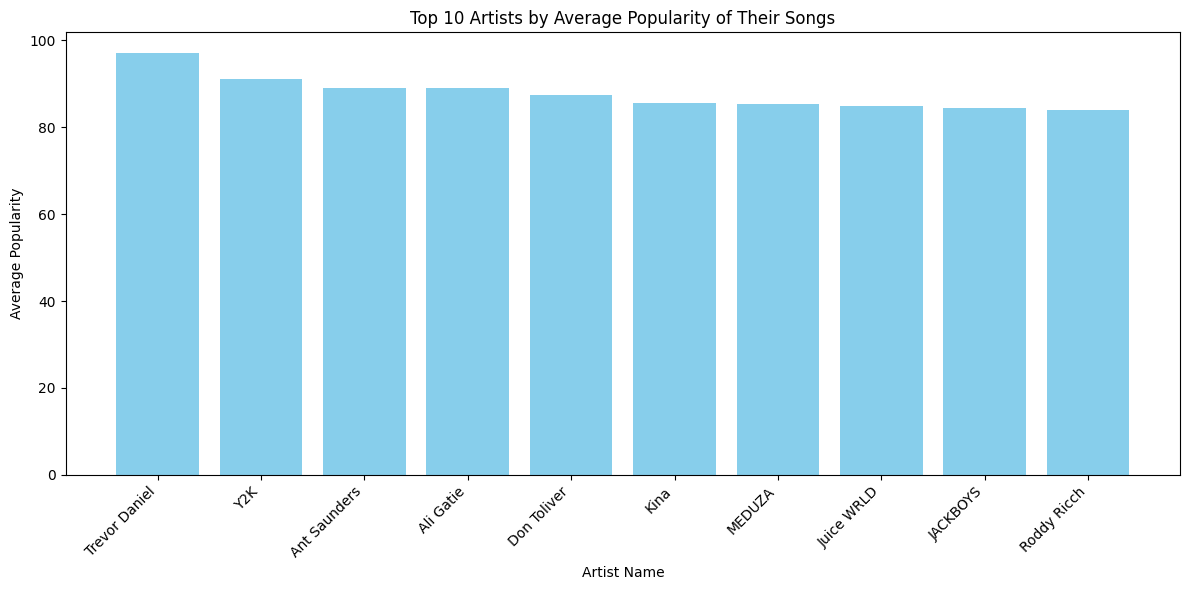

In [22]:
# Group by artist and calculate the average popularity of their songs
average_popularity_by_artist = df.groupby('track_artist')['track_popularity'].mean()

# Sort the artists by their average popularity and get the top 10
top_10_artists = average_popularity_by_artist.sort_values(ascending=False).head(10)

# Convert the result to a DataFrame for easier plotting
top_10_artists_df = top_10_artists.reset_index()


# Create a bar chart for the top 10 artists by average popularity
plt.figure(figsize=(12, 6))
plt.bar(top_10_artists_df['track_artist'], top_10_artists_df['track_popularity'], color='skyblue')
plt.title('Top 10 Artists by Average Popularity of Their Songs')
plt.xlabel('Artist Name')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate artist names for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [23]:
# Count the occurrences of alphanumeric tracks by each artist
alphanumeric_artist_count = non_alpha_track_names['track_artist'].value_counts().reset_index()
alphanumeric_artist_count.columns = ['track_artist', 'alphanumeric_track_count']

# Display the count
print(alphanumeric_artist_count)


            track_artist  alphanumeric_track_count
0                  Queen                       105
1           David Guetta                        54
2          Martin Garrix                        50
3          Calvin Harris                        36
4               Hardwell                        36
...                  ...                       ...
4237               ARMAN                         1
4238                XLII                         1
4239       Iceberg Black                         1
4240     The Snake Corps                         1
4241  Oscar and the Wolf                         1

[4242 rows x 2 columns]


In [24]:
df2.head(1)

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration,track_name_cleaned
0,I TRIED FOR YEARS... NOBODY LISTENED,Iceberg Black,18,WAR,2018.0,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,91.4,40.8,10,-6.71,0,14.1,2.68,11.6,9.44,140.03,2:30,I TRIED FOR YEARS NOBODY LISTENED


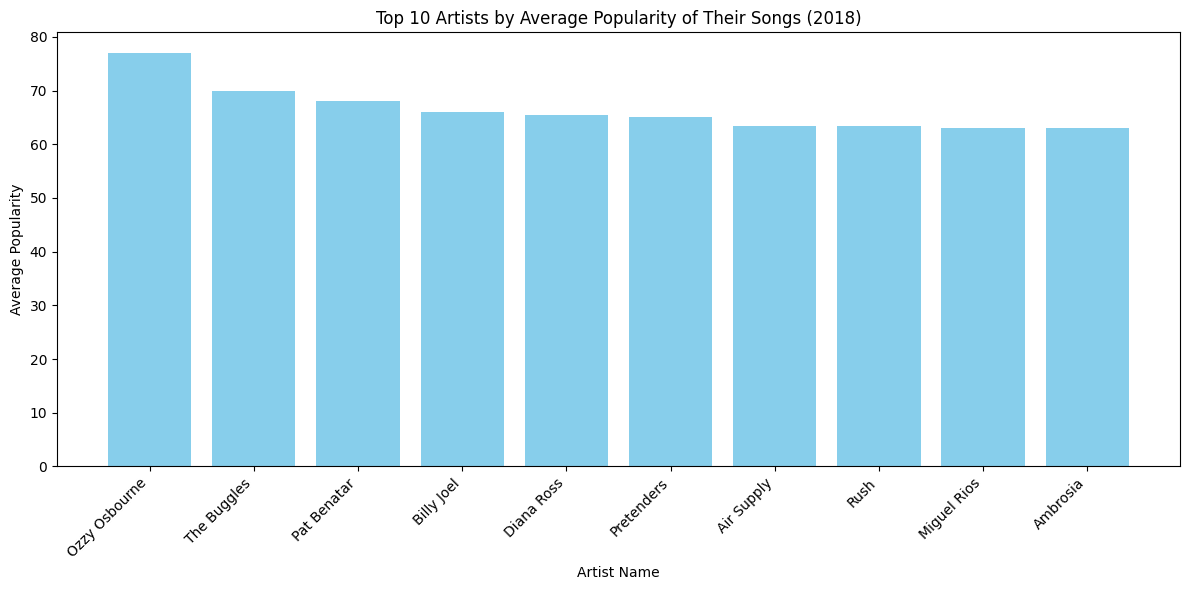

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the Spotify data

# Filter the DataFrame for songs released in 2018
df_2018 = df2[df2['released_year'] == 1980]

# Group by artist and calculate the average popularity of their songs for the year 2018
average_popularity_by_artist_2018 = df_2018.groupby('track_artist')['track_popularity'].mean()

# Sort the artists by their average popularity and get the top 10
top_10_artists_2018 = average_popularity_by_artist_2018.sort_values(ascending=False).head(10)

# Convert the result to a DataFrame for easier plotting
top_10_artists_2018_df = top_10_artists_2018.reset_index()

# Create a bar chart for the top 10 artists by average popularity for 2018
plt.figure(figsize=(12, 6))
plt.bar(top_10_artists_2018_df['track_artist'], top_10_artists_2018_df['track_popularity'], color='skyblue')
plt.title('Top 10 Artists by Average Popularity of Their Songs (2018)')
plt.xlabel('Artist Name')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate artist names for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


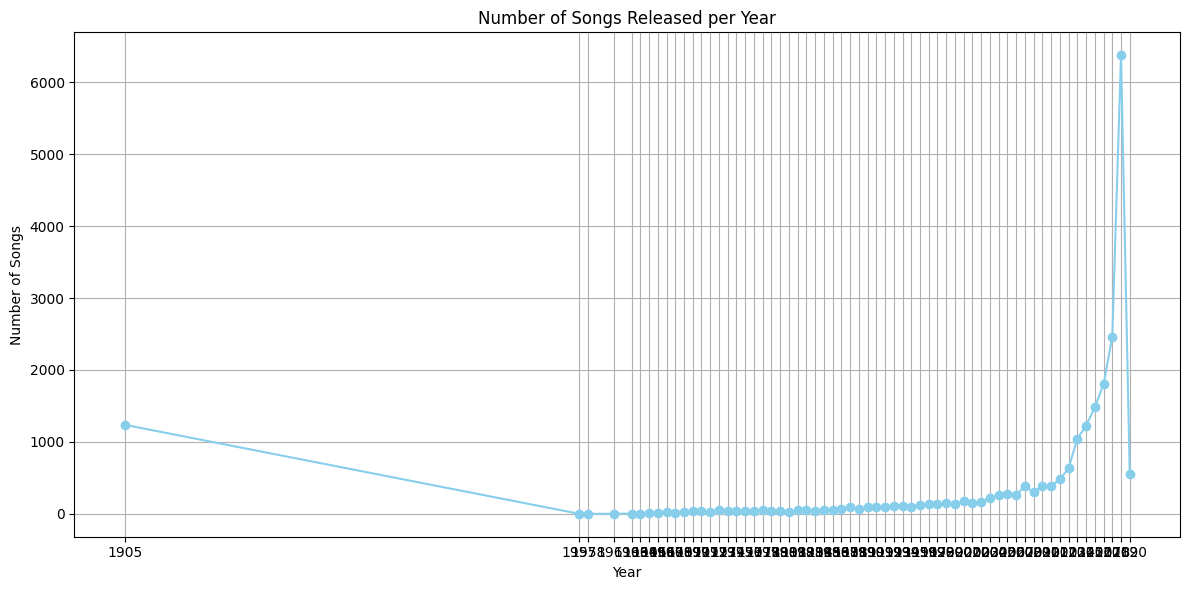

In [26]:


# Group by the released year and count the number of songs for each year
songs_per_year = df2.groupby('released_year')['track_name'].count()

# Alternatively, you can use size() to get the same result
# songs_per_year = df.groupby('released_year').size()

# Sort the result by year (optional, if not already sorted)
songs_per_year = songs_per_year.sort_index()

# Convert the result to a DataFrame for easier plotting
songs_per_year_df = songs_per_year.reset_index()
songs_per_year_df.columns = ['released_year', 'number_of_songs']

# Create a line chart for the number of songs released each year
plt.figure(figsize=(12, 6))
plt.plot(songs_per_year_df['released_year'], songs_per_year_df['number_of_songs'], marker='o', color='skyblue')
plt.title('Number of Songs Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(songs_per_year_df['released_year'])  # Show all years on the x-axis
plt.grid()  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


    Released Year  Number of Songs
0          1905.0             1238
1          1957.0                1
2          1958.0                1
3          1961.0                1
4          1963.0                4
..            ...              ...
57         2016.0             1481
58         2017.0             1799
59         2018.0             2457
60         2019.0             6374
61         2020.0              550

[62 rows x 2 columns]


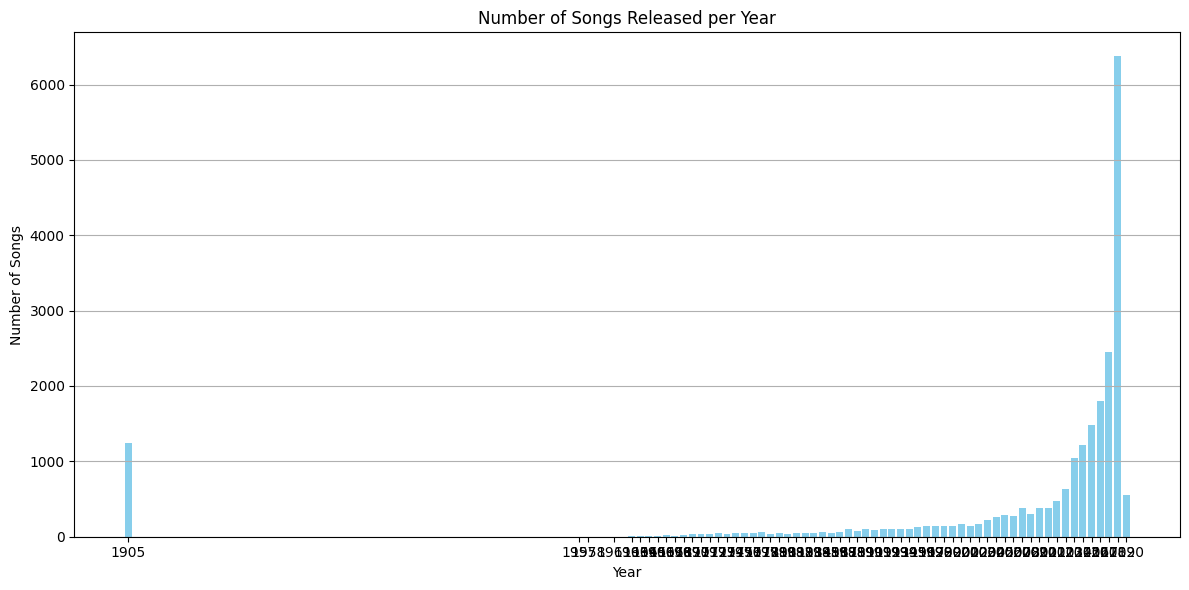

In [27]:
songs_per_year = df2.groupby('released_year')['track_name'].count()

# Convert the result to a DataFrame
songs_per_year_df = songs_per_year.reset_index()
songs_per_year_df.columns = ['Released Year', 'Number of Songs']

# Display the table
print(songs_per_year_df)

# Optionally, create a bar chart for visual representation
plt.figure(figsize=(12, 6))
plt.bar(songs_per_year_df['Released Year'], songs_per_year_df['Number of Songs'], color='skyblue')
plt.title('Number of Songs Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(songs_per_year_df['Released Year'])  # Show all years on the x-axis
plt.grid(axis='y')  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [28]:


# Group by the released year and count the number of songs for each year
songs_per_year = df2.groupby('released_year')['track_name'].count()

# Convert the result to a DataFrame
songs_per_year_df = songs_per_year_df.sort_values(by='Number of Songs', ascending=False)
songs_per_year_df.columns = ['Released Year', 'Number of Songs']

# Display the DataFrame (it will show in a nice tabular format in Jupyter or other IDEs)
songs_per_year_df.head(100)

,Released Year,Number of Songs
60,2019.0,6374
59,2018.0,2457
58,2017.0,1799
57,2016.0,1481
0,1905.0,1238
...,...,...
5,1964.0,4
4,1963.0,4
1,1957.0,1
3,1961.0,1


In [29]:
df2.head(10)

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration,track_name_cleaned
0,I TRIED FOR YEARS... NOBODY LISTENED,Iceberg Black,18,WAR,2018.0,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,91.4,40.8,10,-6.71,0,14.10,2.680000,11.60,9.44,140.03,2:30,I TRIED FOR YEARS NOBODY LISTENED
1,This Is Seagull??.,The Snake Corps,34,Smother Earth,1990.0,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,51.6,58.0,9,-13.29,0,2.95,0.000243,11.00,23.50,135.90,3:58,This Is Seagull
2,#1 Stunna,Big Tymers,48,I Got That Work,2000.0,Hip-Hop Drive,rap,hip hop,55.2,84.2,8,-4.96,1,28.50,1.760000,25.80,56.10,89.02,4:41,Stunna
3,#NAKAMA,XLII,26,#NAKAMA,2019.0,Girl On Fire,r&b,hip pop,79.7,97.0,3,-3.20,1,5.45,38.500000,31.80,56.80,108.04,3:12,NAKAMA
5,#S?­dico,Rawayana,53,#S?­dico,2019.0,Para??so Tropical,latin,tropical,80.5,62.2,1,-10.90,1,14.10,27.400000,10.20,71.60,122.01,5:44,Sdico
6,#Summerlovin,ARMAN,41,#Summerlovin,2019.0,Tropical House ?? 2020 Hits,latin,tropical,81.9,62.0,9,-4.71,1,3.32,41.400000,28.30,69.50,110.00,3:24,Summerlovin
7,#Twerkit,Busta Rhymes,0,#TWERKIT,2013.0,?? Hip Hop Dance Music ?? Urban ?? Trap ??...,rap,southern hip hop,58.4,91.7,6,-4.33,0,49.00,15.200000,44.20,65.20,149.70,3:51,Twerkit
8,#Vivalawldkdz (Roberto Rosso Remix) [feat. Twe...,Roberto Rosso,4,#Vivalawldkdz (Roberto Rosso Remix) [feat. Twe...,2017.0,CHRISTIAN ELECTRO / DANCE / EDM,edm,progressive electro house,56.8,88.3,5,-4.73,0,10.40,1.200000,12.20,57.70,155.00,2:53,Vivalawldkdz Roberto Rosso Remix feat Twelve
9,$$$ - Remix,Saramalacara,49,$$$ (Remix),2019.0,Trapperz Argentina,rap,trap,79.7,51.8,1,-7.80,0,4.63,39.800000,9.24,94.60,139.97,2:03,Remix
10,$. A. N. T. E. R. ?. A.,Doble Porcion,43,Manzanas a la Vuelta,2016.0,HIP-HOP: Latin Rap ['89-present],latin,latin hip hop,50.4,53.4,11,-10.04,0,33.70,62.300000,10.20,81.70,177.95,3:52,A N T E R A


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22634 entries, 0 to 26158
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_name          22633 non-null  object 
 1   track_artist        22633 non-null  object 
 2   track_popularity    22634 non-null  int64  
 3   track_album_name    22633 non-null  object 
 4   released_year       22617 non-null  float64
 5   playlist_name       22634 non-null  object 
 6   playlist_genre      22634 non-null  object 
 7   playlist_subgenre   22634 non-null  object 
 8   danceability        22634 non-null  float64
 9   energy              22634 non-null  float64
 10  key                 22634 non-null  int64  
 11  loudness            22634 non-null  float64
 12  mode                22634 non-null  int64  
 13  speechiness         22634 non-null  float64
 14  acousticness        22634 non-null  float64
 15  liveness            22634 non-null  float64
 16  valence  

In [31]:
df2.isnull().sum()

track_name             1
track_artist           1
track_popularity       0
track_album_name       1
released_year         17
playlist_name          0
playlist_genre         0
playlist_subgenre      0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
liveness               0
valence                0
tempo                  0
duration               0
track_name_cleaned     1
dtype: int64

In [32]:
# Drop rows with any NaN values
df2_cleaned = df2.dropna()

# Check the DataFrame after removing NaN rows
print(df2_cleaned)

# Save the cleaned DataFrame to a CSV file
#df2_cleaned.to_excel('spotify_cleaned.xlsx', index=False)


                                 track_name     track_artist  \
0      I TRIED FOR YEARS... NOBODY LISTENED    Iceberg Black   
1                       This Is Seagull??.  The Snake Corps   
2                                 #1 Stunna       Big Tymers   
3                                   #NAKAMA             XLII   
5                                  #S?­dico         Rawayana   
...                                     ...              ...   
26154         Zu Den Sternen - Original Mix     The Second I   
26155                               Zum Zum     Daddy Yankee   
26156                                 Zumba         Don Omar   
26157                             Zun Da Da             Zion   
26158              Zweistellige Haftstrafen      Capital Bra   

       track_popularity                        track_album_name  \
0                    18                                     WAR   
1                    34                           Smother Earth   
2                    48       

In [33]:
#df_cleaned.to_excel('spotify_cleaned.xlsx', index=False)

In [35]:
df2_cleaned.head(10)

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration,track_name_cleaned
0,I TRIED FOR YEARS... NOBODY LISTENED,Iceberg Black,18,WAR,2018.0,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,91.4,40.8,10,-6.71,0,14.10,2.680000,11.60,9.44,140.03,2:30,I TRIED FOR YEARS NOBODY LISTENED
1,This Is Seagull??.,The Snake Corps,34,Smother Earth,1990.0,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,51.6,58.0,9,-13.29,0,2.95,0.000243,11.00,23.50,135.90,3:58,This Is Seagull
2,#1 Stunna,Big Tymers,48,I Got That Work,2000.0,Hip-Hop Drive,rap,hip hop,55.2,84.2,8,-4.96,1,28.50,1.760000,25.80,56.10,89.02,4:41,Stunna
3,#NAKAMA,XLII,26,#NAKAMA,2019.0,Girl On Fire,r&b,hip pop,79.7,97.0,3,-3.20,1,5.45,38.500000,31.80,56.80,108.04,3:12,NAKAMA
5,#S?­dico,Rawayana,53,#S?­dico,2019.0,Para??so Tropical,latin,tropical,80.5,62.2,1,-10.90,1,14.10,27.400000,10.20,71.60,122.01,5:44,Sdico
6,#Summerlovin,ARMAN,41,#Summerlovin,2019.0,Tropical House ?? 2020 Hits,latin,tropical,81.9,62.0,9,-4.71,1,3.32,41.400000,28.30,69.50,110.00,3:24,Summerlovin
7,#Twerkit,Busta Rhymes,0,#TWERKIT,2013.0,?? Hip Hop Dance Music ?? Urban ?? Trap ??...,rap,southern hip hop,58.4,91.7,6,-4.33,0,49.00,15.200000,44.20,65.20,149.70,3:51,Twerkit
8,#Vivalawldkdz (Roberto Rosso Remix) [feat. Twe...,Roberto Rosso,4,#Vivalawldkdz (Roberto Rosso Remix) [feat. Twe...,2017.0,CHRISTIAN ELECTRO / DANCE / EDM,edm,progressive electro house,56.8,88.3,5,-4.73,0,10.40,1.200000,12.20,57.70,155.00,2:53,Vivalawldkdz Roberto Rosso Remix feat Twelve
9,$$$ - Remix,Saramalacara,49,$$$ (Remix),2019.0,Trapperz Argentina,rap,trap,79.7,51.8,1,-7.80,0,4.63,39.800000,9.24,94.60,139.97,2:03,Remix
10,$. A. N. T. E. R. ?. A.,Doble Porcion,43,Manzanas a la Vuelta,2016.0,HIP-HOP: Latin Rap ['89-present],latin,latin hip hop,50.4,53.4,11,-10.04,0,33.70,62.300000,10.20,81.70,177.95,3:52,A N T E R A


In [38]:
df2_cleaned.loc[:, 'released_year'] = df2_cleaned['released_year'].astype(int)

df2_cleaned.head(3)

,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration,track_name_cleaned
0,I TRIED FOR YEARS... NOBODY LISTENED,Iceberg Black,18,WAR,2018,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,91.4,40.8,10,-6.71,0,14.10,2.680000,11.6,9.44,140.03,2:30,I TRIED FOR YEARS NOBODY LISTENED
1,This Is Seagull??.,The Snake Corps,34,Smother Earth,1990,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,51.6,58.0,9,-13.29,0,2.95,0.000243,11.0,23.50,135.90,3:58,This Is Seagull
2,#1 Stunna,Big Tymers,48,I Got That Work,2000,Hip-Hop Drive,rap,hip hop,55.2,84.2,8,-4.96,1,28.50,1.760000,25.8,56.10,89.02,4:41,Stunna


In [52]:
empty_artist_names = df2_cleaned[df2_cleaned['track_name_cleaned'].str.strip() == '']
artist_count = empty_artist_names.shape[0]
print(artist_count)


128


In [42]:
# Remove rows where 'track_name_cleaned' contains empty strings or just whitespace
df2_cleaned = df2_cleaned[~(df2_cleaned['track_name_cleaned'].str.strip() == '')]

# Verify that the rows with empty 'track_name_cleaned' have been removed
df2_cleaned.head()


,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration,track_name_cleaned
0,I TRIED FOR YEARS... NOBODY LISTENED,Iceberg Black,18,WAR,2018,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,91.4,40.8,10,-6.71,0,14.10,2.680000,11.6,9.44,140.03,2:30,I TRIED FOR YEARS NOBODY LISTENED
1,This Is Seagull??.,The Snake Corps,34,Smother Earth,1990,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,51.6,58.0,9,-13.29,0,2.95,0.000243,11.0,23.50,135.90,3:58,This Is Seagull
2,#1 Stunna,Big Tymers,48,I Got That Work,2000,Hip-Hop Drive,rap,hip hop,55.2,84.2,8,-4.96,1,28.50,1.760000,25.8,56.10,89.02,4:41,Stunna
3,#NAKAMA,XLII,26,#NAKAMA,2019,Girl On Fire,r&b,hip pop,79.7,97.0,3,-3.20,1,5.45,38.500000,31.8,56.80,108.04,3:12,NAKAMA
5,#S?­dico,Rawayana,53,#S?­dico,2019,Para??so Tropical,latin,tropical,80.5,62.2,1,-10.90,1,14.10,27.400000,10.2,71.60,122.01,5:44,Sdico


In [51]:
import re

# Define a function to remove unwanted symbols, keeping only alphabetic characters and $
def clean_artist_name(track_album_name):
    # Replace all characters that are not alphabets, spaces, or $
    return re.sub(r'[^a-zA-Z\s$(),]', '', track_album_name)

# Apply the function to the 'track_artist' column
df2_cleaned['track_album_name_cleaned'] = df2_cleaned['track_album_name'].apply(clean_artist_name)

# Check the updated DataFrame
df2_cleaned[['track_album_name', 'track_album_name_cleaned']].head(30)


,track_album_name,track_album_name_cleaned
0,WAR,WAR
1,Smother Earth,Smother Earth
2,I Got That Work,I Got That Work
3,#NAKAMA,NAKAMA
5,#S?­dico,Sdico
6,#Summerlovin,Summerlovin
7,#TWERKIT,TWERKIT
8,#Vivalawldkdz (Roberto Rosso Remix) [feat. Twe...,Vivalawldkdz (Roberto Rosso Remix) feat Twelve
9,$$$ (Remix),$$$ (Remix)
10,Manzanas a la Vuelta,Manzanas a la Vuelta


In [53]:
empty_track_album_names = df2_cleaned[df2_cleaned['track_album_name_cleaned'].str.strip() == '']
artist_count = empty_track_album_names.shape[0]
print(artist_count)


128


In [54]:
# Remove rows where 'track_name_cleaned' contains empty strings or just whitespace
df2_cleaned = df2_cleaned[~(df2_cleaned['track_album_name_cleaned'].str.strip() == '')]

# Verify that the rows with empty 'track_name_cleaned' have been removed
df2_cleaned.head()


,track_name,track_artist,track_popularity,track_album_name,released_year,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,...,mode,speechiness,acousticness,liveness,valence,tempo,duration,track_name_cleaned,track_artist_cleaned,track_album_name_cleaned
0,I TRIED FOR YEARS... NOBODY LISTENED,Iceberg Black,18,WAR,2018,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,91.4,40.8,...,0,14.10,2.680000,11.6,9.44,140.03,2:30,I TRIED FOR YEARS NOBODY LISTENED,Iceberg Black,WAR
1,This Is Seagull??.,The Snake Corps,34,Smother Earth,1990,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,51.6,58.0,...,0,2.95,0.000243,11.0,23.50,135.90,3:58,This Is Seagull,The Snake Corps,Smother Earth
2,#1 Stunna,Big Tymers,48,I Got That Work,2000,Hip-Hop Drive,rap,hip hop,55.2,84.2,...,1,28.50,1.760000,25.8,56.10,89.02,4:41,Stunna,Big Tymers,I Got That Work
3,#NAKAMA,XLII,26,#NAKAMA,2019,Girl On Fire,r&b,hip pop,79.7,97.0,...,1,5.45,38.500000,31.8,56.80,108.04,3:12,NAKAMA,XLII,NAKAMA
5,#S?­dico,Rawayana,53,#S?­dico,2019,Para??so Tropical,latin,tropical,80.5,62.2,...,1,14.10,27.400000,10.2,71.60,122.01,5:44,Sdico,Rawayana,Sdico


In [55]:
df2_cleaned.to_excel('spotify_cleaned.xlsx', index=False)

In [58]:
# Group by artist and released year, then calculate the average for multiple attributes and count the number of songs
average_attributes_df = df2_cleaned.groupby(['track_artist_cleaned', 'released_year']).agg(
    danceability=('danceability', 'mean'),
    energy=('energy', 'mean'),
    valence=('valence', 'mean'),
    tempo=('tempo', 'mean'),
    number_of_songs=('track_name', 'size')  # Count the number of songs
).reset_index()

# Convert 'released_year' to integer type
average_attributes_df['released_year'] = average_attributes_df['released_year'].astype(int)

# Round the averages to one decimal place for each attribute
average_attributes_df['danceability'] = average_attributes_df['danceability'].round(1)
average_attributes_df['energy'] = average_attributes_df['energy'].round(1)
average_attributes_df['valence'] = average_attributes_df['valence'].round(1)
average_attributes_df['tempo'] = average_attributes_df['tempo'].round(1)

# Export the resulting DataFrame to CSV
average_attributes_df.to_excel('average_attributes_and_song_count_by_artist_year.xlsx', index=False)


In [59]:
# Group by artist and released year, then calculate the average popularity
average_popularity_df = df2_cleaned.groupby(['track_artist_cleaned', 'released_year'])['track_popularity'].mean().reset_index()

# Convert the 'released_year' to integer type
average_popularity_df['released_year'] = average_popularity_df['released_year'].astype(int)

# Round the average popularity to one decimal place and convert to string
average_popularity_df['averagePopularity'] = average_popularity_df['track_popularity'].round(1)

# Rename the columns for clarity
average_popularity_df.rename(columns={'track_popularity': 'averagePopularity'}, inplace=True)

average_popularity_df.to_excel('popularity.xlsx', index=False)
